In [15]:
import numpy as np
import pandas as pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz

In [11]:
raw_data=pd.read_csv('model_sample.csv')#读取csv文件
print(raw_data.tail(2)) #打印数据后两行

      user_id  y  x_001  x_002  x_003  x_004  x_005  x_006  x_007  x_008  ...  \
11015  A21940  0    0.0   23.0      0      0      0      0      0      0  ...   
11016  A21941  1    0.0   35.0      0      0      0      0      0      0  ...   

       x_190  x_191  x_192  x_193  x_194  x_195  x_196  x_197  x_198  x_199  
11015    1.0    0.0    3.0    1.0    5.0    1.0    3.0    1.0    7.0    1.0  
11016    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  

[2 rows x 201 columns]


In [12]:
print(list(raw_data.columns),"\n")  #输出所有原始列

['user_id', 'y', 'x_001', 'x_002', 'x_003', 'x_004', 'x_005', 'x_006', 'x_007', 'x_008', 'x_009', 'x_010', 'x_011', 'x_012', 'x_013', 'x_014', 'x_015', 'x_016', 'x_017', 'x_018', 'x_019', 'x_020', 'x_021', 'x_022', 'x_023', 'x_024', 'x_025', 'x_026', 'x_027', 'x_028', 'x_029', 'x_030', 'x_031', 'x_032', 'x_033', 'x_034', 'x_035', 'x_036', 'x_037', 'x_038', 'x_039', 'x_040', 'x_041', 'x_042', 'x_043', 'x_044', 'x_045', 'x_046', 'x_047', 'x_048', 'x_049', 'x_050', 'x_051', 'x_052', 'x_053', 'x_054', 'x_055', 'x_056', 'x_057', 'x_058', 'x_059', 'x_060', 'x_061', 'x_062', 'x_063', 'x_064', 'x_065', 'x_066', 'x_067', 'x_068', 'x_069', 'x_070', 'x_071', 'x_072', 'x_073', 'x_074', 'x_075', 'x_076', 'x_077', 'x_078', 'x_079', 'x_080', 'x_081', 'x_082', 'x_083', 'x_084', 'x_085', 'x_086', 'x_087', 'x_088', 'x_089', 'x_090', 'x_091', 'x_092', 'x_093', 'x_094', 'x_095', 'x_096', 'x_097', 'x_098', 'x_099', 'x_100', 'x_101', 'x_102', 'x_103', 'x_104', 'x_105', 'x_106', 'x_107', 'x_108', 'x_109', 'x

In [9]:
#删除全是空值的列
raw_data.dropna(axis="columns",how='all',inplace=True)
#raw_data

In [7]:
#删除全是空值的行
raw_data.dropna(axis="index",how='all',inplace=True)
#raw_data

In [13]:
raw_data.dropna()  #发现没有一行数据是全空的

,user_id,y,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,...,x_190,x_191,x_192,x_193,x_194,x_195,x_196,x_197,x_198,x_199


In [15]:
def deleteTheCol(cutoff=0.5,file,outfile):
    #运行这个函数即为自定义删除缺失为（cutoff*100）%的列
    import pandas as pd
    import os
    inputfile=file
    df=pd.read_csv(inputfile)
    for i in  [column for column in df]:
        n = len(df)
        cnt = df[i].count()
        if (float(cnt) / n) < cutoff:
            df.drop(i, axis=1, inplace=True)
    if (os.path.exists(outfile)):
        os.remove(outfile)
    df.to_csv(outfile)
    return True

In [16]:
deleteTheCol(cutoff=0.5,file="model_sample.csv",outfile="Pre_Sample.csv")

True

In [40]:
def deleteTheRow(file,outfile):
    #计算每行不缺失值的比例
    import pandas as pd
    import numpy as np
    import os
    df = pd.read_csv(file)
    print("一共有：",df.shape[0]-1,"行")
    rows_not_null = df.count(axis=1)
    df['NotNumber'] = rows_not_null/df.shape[1]
    if(os.path.exists(outfile)):
        os.remove(outfile)
    df.to_csv(outfile)
    return True

In [42]:
deleteTheRow(file="Pre_Sample.csv",outfile="model_sample_NotNumber.csv")

一共有： 11016 行


True

In [43]:
import pandas as pd
data = pd.read_csv("model_sample_NotNumber.csv",index_col=0)
data.head()
#Excel筛选NotNnumber在0.5以上的数据

,user_id,y,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,...,x_191,x_192,x_193,x_194,x_195,x_196,x_197,x_198,x_199,NotNumber
0,A00002,0,0.0,32.0,0,0,0,0,0,0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000
1,A00005,0,0.0,29.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.551181
2,A00006,0,0.0,31.0,0,0,0,0,0,0,...,2.0,4.0,4.0,6.0,6.0,6.0,6.0,10.0,10.0,1.000000
3,A00008,0,0.0,22.0,0,0,0,0,0,0,...,3.0,3.0,3.0,5.0,5.0,3.0,3.0,7.0,7.0,0.937008
4,A00009,0,0.0,31.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.330709


In [49]:
import pandas as pd
data = pd.read_csv("pre_fill.csv",index_col=0)
data.head()
#缺失值处理完毕

,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,x_010,...,x_191,x_192,x_193,x_194,x_195,x_196,x_197,x_198,x_199,y
user_id,,,,,,,,,,,,,,,,,,,,,
A00002,0,32,0,0,0,0,0,0,1,1,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
A00005,0,29,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
A00006,0,31,0,0,0,0,0,0,0,0,...,2.0,4.0,4.0,6.0,6.0,6.0,6.0,10.0,10.0,0
A00008,0,22,0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,5.0,5.0,3.0,3.0,7.0,7.0,0
A00013,0,32,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,1.0,1.0,9.0,5.0,12.0,8.0,0


In [53]:
print(list(data.columns),"\n")  #输出目前所有原始列
#数据填充
#前19个变量用中位数填充，.fillna 在DataFrame里面直接进行填补
data.iloc[:,0:19] = data.iloc[:,0:19].fillna(data.iloc[:,0:19].median())
#第27.33个等级变量用中位数填充，.fillna 在DataFrame里面直接进行填补
data.iloc[:,[26,32]] = data.iloc[:,[26,32]].fillna(data.iloc[:,[26,32]].median())

['x_001', 'x_002', 'x_003', 'x_004', 'x_005', 'x_006', 'x_007', 'x_008', 'x_009', 'x_010', 'x_011', 'x_012', 'x_013', 'x_014', 'x_015', 'x_016', 'x_017', 'x_018', 'x_019', 'x_020', 'x_021', 'x_022', 'x_023', 'x_024', 'x_025', 'x_026', 'x_027', 'x_028', 'x_029', 'x_030', 'x_031', 'x_032', 'x_033', 'x_034', 'x_035', 'x_036', 'x_037', 'x_038', 'x_039', 'x_040', 'x_041', 'x_042', 'x_043', 'x_044', 'x_045', 'x_046', 'x_047', 'x_055', 'x_056', 'x_057', 'x_058', 'x_059', 'x_060', 'x_061', 'x_074', 'x_075', 'x_076', 'x_077', 'x_078', 'x_079', 'x_080', 'x_121', 'x_122', 'x_123', 'x_124', 'x_125', 'x_126', 'x_127', 'x_131', 'x_132', 'x_134', 'x_137', 'x_139', 'x_142', 'x_143', 'x_144', 'x_145', 'x_146', 'x_147', 'x_148', 'x_149', 'x_150', 'x_151', 'x_152', 'x_153', 'x_154', 'x_155', 'x_156', 'x_157', 'x_158', 'x_162', 'x_163', 'x_164', 'x_165', 'x_166', 'x_167', 'x_168', 'x_169', 'x_170', 'x_171', 'x_175', 'x_176', 'x_177', 'x_178', 'x_179', 'x_180', 'x_181', 'x_182', 'x_183', 'x_184', 'x_185', 

In [55]:
#第20-26个变量用均数填充，.fillna 在DataFrame里面直接进行填补
data.iloc[:,19:26] = data.iloc[:,19:26].fillna(data.iloc[:,19:26].mean())
#第28-32个变量用均数填充，.fillna 在DataFrame里面直接进行填补
data.iloc[:,27:32] = data.iloc[:,27:32].fillna(data.iloc[:,27:32].mean())
#第34-199个变量用均数填充，.fillna 在DataFrame里面直接进行填补
data.iloc[:,33:199] = data.iloc[:,33:199].fillna(data.iloc[:,33:199].mean())

In [65]:
data.head()
data.to_csv("after_fill.csv")

In [70]:
#去量钢化
#数据归一化，转化为-0-1之间
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()    #实例化
scaler=scaler.fit(data)   #生成最大值和最小值
result=scaler.transform(data)  #通过接口函数导出结果
print(result)
result.mean()
result.var()

[[0.         0.33333333 0.         ... 0.01104972 0.01515152 0.        ]
 [0.         0.25641026 0.         ... 0.04628197 0.05942765 0.        ]
 [0.         0.30769231 0.         ... 0.05524862 0.07575758 0.        ]
 ...
 [0.         0.23076923 0.         ... 0.         0.         0.        ]
 [0.         0.1025641  0.         ... 0.03867403 0.00757576 0.        ]
 [0.         0.41025641 0.         ... 0.00552486 0.00757576 1.        ]]


0.03422590240459709

In [74]:
#反归一化，再试试后面的标准化
result_=scaler.inverse_transform(result)
result_

array([[ 0.        , 32.        ,  0.        , ...,  2.        ,
         2.        ,  0.        ],
       [ 0.        , 29.        ,  0.        , ...,  8.37703672,
         7.84444927,  0.        ],
       [ 0.        , 31.        ,  0.        , ..., 10.        ,
        10.        ,  0.        ],
       ...,
       [ 0.        , 28.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 23.        ,  0.        , ...,  7.        ,
         1.        ,  0.        ],
       [ 0.        , 35.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ]])

In [80]:
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler_=StandardScaler()    #实例化
scaler_.fit(data)      #生成均值和方差
scaler_.mean_
scaler_.var_
data_std=scaler_.transform(result_)
data_std
#x_std.mean()
#x_std.var()
#由于在PCA中往往用标准化去量纲，故采用StandardScaler
data.to_csv("after_fill_std.csv")

In [87]:
# onehot 编码
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import pandas as pd
data1= pd.read_csv("after_fill_std.csv",index_col=0)
#对等级变量编码
X = data1.iloc[:,[26,32]]
X.head()

,x_027,x_033
user_id,,
A00002,1,1
A00005,1,1
A00006,2,2
A00008,0,1
A00013,0,1


In [90]:
enc=OneHotEncoder(categories='auto').fit(X)
X1=enc.transform(X).toarray()
X1

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [109]:
enc.get_feature_names()

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x1_0', 'x1_1', 'x1_2',
       'x1_3', 'x1_4'], dtype=object)

In [112]:
#与原始数据表相连组成新的特征的数据
newdata = pd.concat([data1,pd.DataFrame(X1)],axis=1)
newdata.drop(["x_027","x_033"],axis=1,inplace=True)

In [101]:
newdata.to_csv("enddata.csv")
#数据预处理结束，以下为特征选取和降维

In [3]:
#PCA
import pandas as pd
data2= pd.read_csv("enddata.csv",index_col=0)
#data2.head()

In [4]:
from sklearn.decomposition import PCA
XX=data2.iloc[:,0:-1]
XX.shape
XX.head()

,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,x_010,...,x_027_1,x_027_2,x_027_3,x_027_4,x_027_5,x_033_1,x_033_2,x_033_3,x_033_4,x_033_5
A00002,0,32,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
A00005,0,29,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
A00006,0,31,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
A00008,0,22,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
A00013,0,32,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [5]:
YY=data2['y']
YY.shape

(9701,)

In [6]:
import pandas as pd
#pd.DataFrame(XX)

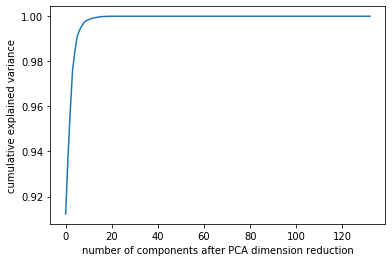

In [9]:
#看看n_components取几
pca_line=PCA().fit(XX)
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after PCA dimension reduction")
plt.ylabel("cumulative explained variance")
plt.show()
#看累计贡献率，就取20吧

In [10]:
pca=PCA(n_components=20)
pca=pca.fit(XX)
X_=pca.transform(XX)
X_

array([[-5.37353739e+04,  1.86747926e+03, -1.01121802e+04, ...,
        -3.55060710e+02,  3.84938067e+01, -1.16660449e+01],
       [-4.32929362e+04,  1.68302196e+03,  3.82938803e+02, ...,
         4.26578926e+01, -2.75874494e+02,  5.33901218e+01],
       [-3.14514196e+04, -1.03936949e+03,  6.04881680e+03, ...,
        -8.49810703e+02,  1.80543458e+02,  3.48626683e+01],
       ...,
       [-1.23635723e+00, -1.11503959e+00, -8.04096257e+01, ...,
        -7.43301981e+01, -4.93220500e+00,  3.94427320e+00],
       [-2.94007629e+04,  7.02578185e+02, -8.09843721e+03, ...,
        -1.88902286e+02,  1.45060955e+02, -5.74582508e+02],
       [-4.24511927e+04,  2.19168608e+03, -1.19468991e+04, ...,
        -4.56077203e+02, -4.17675982e+02,  1.60868036e+02]])

In [158]:
pca.explained_variance_   #查看每个新特征所带信息量的大小

array([2.68938548e+10, 7.42968664e+08, 6.04536375e+08, 5.36229415e+08,
       2.43012116e+08, 1.93697651e+08, 8.31459173e+07, 5.49359982e+07,
       4.76039993e+07, 2.23231170e+07, 1.23623227e+07, 1.20871034e+07,
       9.30013500e+06, 6.16156179e+06, 5.32114086e+06, 3.74902167e+06,
       3.09505348e+06, 2.16944366e+06, 9.25206811e+05, 8.49032124e+05])

In [11]:
pca.explained_variance_ratio_ #查看降维后每个新特征所占的信息量占原始数据总信息量的百分比

array([9.12303095e-01, 2.52032525e-02, 2.05073021e-02, 1.81901687e-02,
       8.24354514e-03, 6.57068198e-03, 2.82050596e-03, 1.86355885e-03,
       1.61484013e-03, 7.57252872e-04, 4.19359195e-04, 4.10023107e-04,
       3.15482552e-04, 2.09014734e-04, 1.80505670e-04, 1.27175673e-04,
       1.04991527e-04, 7.35926548e-05, 3.13852010e-05, 2.88011756e-05])

In [12]:
pca.explained_variance_ratio_.sum()#查看降维后20个特征总的贡献率

0.9999745348432884

In [13]:
#以下为数据平衡
#查看y的分布，4：1可见类别不平衡
print(data2.y.value_counts())

0    7658
1    2043
Name: y, dtype: int64


In [30]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='auto',random_state=20)
oversampled_XX,oversampled_YY=sm.fit_sample(data2.drop('y',axis=1),data2['y'])
oversampled_data=pd.concat([pd.DataFrame(oversampled_XX),pd.DataFrame(oversampled_YY)],axis=1)
print(oversampled_YY.value_counts())
oversampled_data.shape

1    7658
0    7658
Name: y, dtype: int64


(15316, 134)

In [32]:
oversampled_data.to_csv("afterbalance.csv")
#数据平衡完毕

In [1]:
#决策树
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
treedata= pd.read_csv("afterbalance.csv",index_col=0)
treedata.head()

,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,x_010,...,x_027_2,x_027_3,x_027_4,x_027_5,x_033_1,x_033_2,x_033_3,x_033_4,x_033_5,y
0,0,32,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
1,0,29,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,31,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [2]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(treedata.iloc[:,0:-1],treedata['y'],test_size=0.3)

In [3]:
Xtrain.shape

(10721, 133)

In [4]:
Xtest.shape

(4595, 133)

In [62]:
#建立训练模型
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=20,splitter="random",max_depth=10)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.8069640914036996

In [63]:
#画树，Q：如何树的图片尺寸变小呢？
import graphviz
dot_data = tree.export_graphviz(clf
                                ,class_names=["0","1"]
                                ,filled=True
                                ,rounded=True
)
graph = graphviz.Source(dot_data)
#graph

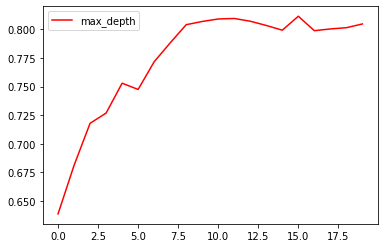

In [69]:
#确定最优剪枝max_depth的超参数
import matplotlib.pyplot as plt
test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                        ,criterion="entropy"
                                        ,random_state=20
                                        ,splitter="random"
    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(test,color="red",label="max_depth")
plt.legend()
plt.show()
#所以，树深max_depth取10

In [94]:
#交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [93]:
scores = cross_val_score(clf,treedata.iloc[:,0:-1],treedata['y'],cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.62989556 0.6462141  0.71801567 0.86814621 0.85835509 0.87663185
 0.88308295 0.85630307 0.86675376 0.86218158]
Average cross-validation score: 0.81


In [ ]:
#网格搜索
from sklearn.model_selection import GridSearchCV
#设置要搜索的参数网格
param_grid = [{'min_samples_split': np.arange(2,100,2)
               ,'min_samples_leaf': np.arange(2,100,2)}]
clf1=GridSearchCV(DecisionTreeClassifier(max_depth=10
                                        ,criterion="entropy"
                                        ,random_state=20
                                        ,splitter="random"
    ), param_grid, cv=10)
clf1.fit(XX,YY)
print("best param:{0}\nbest score:{1}".format(clf1.best_params_, clf1.best_score_))

In [99]:
#随机搜索
from sklearn.model_selection import  RandomizedSearchCV
params = [{'min_samples_split': np.arange(2,100,2)
           ,'min_samples_leaf': np.arange(2,100,2)}]
clf2=RandomizedSearchCV(DecisionTreeClassifier(max_depth=10
                                        ,criterion="entropy"
                                        ,random_state=20
                                        ,splitter="random"
    ), params, cv=10)
clf2.fit(XX,YY)
print("best param:{0}\nbest score:{1}".format(clf2.best_params_, clf2.best_score_))

best param:{'min_samples_split': 46, 'min_samples_leaf': 48}
best score:0.7856934608810132


In [6]:
#调参后
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=20,splitter="random",max_depth=10,min_samples_split=46)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest) #返回预测的准确度
score
#预测精度提升了一点

0.816974972796518

In [7]:
#二分类评估
from sklearn.metrics import confusion_matrix
pred_class=clf.predict(Xtest)
confusion = confusion_matrix(Ytest, pred_class)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1964  326]
 [ 515 1790]]


In [12]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, pred_class))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2290
           1       0.85      0.78      0.81      2305

    accuracy                           0.82      4595
   macro avg       0.82      0.82      0.82      4595
weighted avg       0.82      0.82      0.82      4595



Text(0, 0.5, 'Recall')

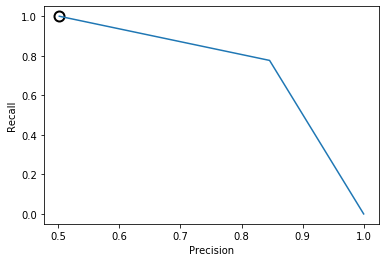

In [17]:
#precision_recall曲线
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Ytest,pred_class)
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

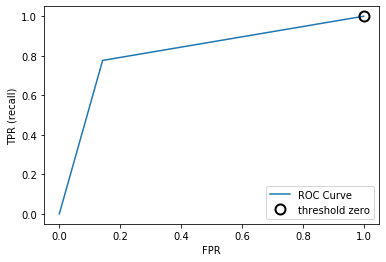

In [18]:
#ROC曲线
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Ytest,pred_class)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)